# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [85]:
%matplotlib inline
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [86]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [87]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\nolan\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [88]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


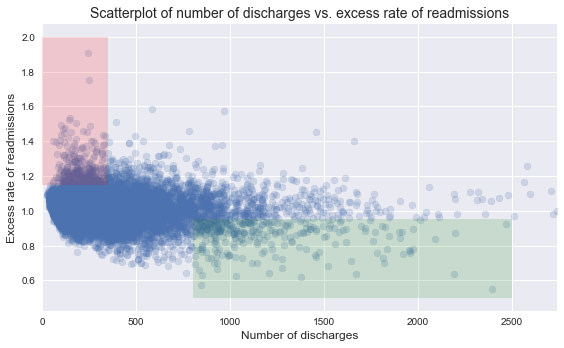

In [89]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [90]:
# Your turn

### A. Do you agree with the above analysis and recommendations? Why or why not:

I do not agree with the preliminary analysis. The downward trend is not very apparent and could what is there could be due to chance. Also, they provide no statistical proof to their claims, besides choosing to compare the mean at two arbitrary points

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

I will construct a two-Sample t-test, in order to test whether the mean number of readmissions of the two populations (small and large hospitals) are significantly different from one another.

The two populations are unpaired and independent from one onther

The <b> Null Hyptohesis </b> is that there is no difference in readmission rate between small (< 100 Discharges) and large hospitals(>1000 Discharges). 
$H_0 :$ ($μ_s$ = $μ_l$)



In [91]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [92]:
clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


The correlation between the two variables is very low. This is concerning

In [93]:
#Cleaning the rows with Not Available for Number of Discharges
clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio'],
                              inplace=True)

In [94]:
# Seperating the data into the two groups we want to compare
small_hosp = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]
large_hosp = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]

# To make sure there are enough observations for a hypothesis test to statistically accurate
print('Small Hospital Size: ',len(small_hosp), 'Large Hospital Size: ',len(large_hosp),'\n',
     'Small Hospital Mean: ',np.mean(small_hosp['Excess Readmission Ratio']), 'Large Hospital Mean: ',np.mean(large_hosp['Excess Readmission Ratio']),'\n',
      'Small Hospital Std: ', np.std(small_hosp['Excess Readmission Ratio']),'Large Hospital Std: ',np.std(large_hosp['Excess Readmission Ratio']), '\n',
     'Small Hospital Variance: ', np.var(small_hosp['Excess Readmission Ratio']),'Large Hospital Variance: ',np.var(large_hosp['Excess Readmission Ratio']))

Small Hospital Size:  1188 Large Hospital Size:  463 
 Small Hospital Mean:  1.0226183501683506 Large Hospital Mean:  0.9783354211663071 
 Small Hospital Std:  0.05795419632801004 Large Hospital Std:  0.11987768585552241 
 Small Hospital Variance:  0.003358688872025533 Large Hospital Variance:  0.01437065956607532


In [95]:
'''
We will first do the bootsrap replicate method with 10000 replicates to show us that if the null hypothesis was true, 
how many times we would see the difference in means greater or equal to the current differnece present.
'''

# Compute difference of mean Number of Discharges from experiment
empirical_diff_means = np.mean(small_hosp['Excess Readmission Ratio']) - np.mean(large_hosp['Excess Readmission Ratio'])

# Concatenate discharges
hosp_concat = np.concatenate((small_hosp['Excess Readmission Ratio'], large_hosp['Excess Readmission Ratio']))

#Compute mean of all discharges: 
mean_discharge = np.mean(hosp_concat)

# Generate shifted arrays
small_hosp_shifted = small_hosp['Excess Readmission Ratio'] - np.mean(small_hosp['Excess Readmission Ratio']) + mean_discharge
large_hosp_shifted = large_hosp['Excess Readmission Ratio'] - np.mean(large_hosp['Excess Readmission Ratio']) + mean_discharge

# Initialize array of replicates
bs_replicates_small = np.empty(10000)
bs_replicates_large = np.empty(10000)

# Generate replicates and Compute 10,000 bootstrap replicates from shifted arrays
for i in range(10000):
    bs_replicates_small[i] = np.mean(np.random.choice(small_hosp_shifted, size= len(small_hosp_shifted)))
    bs_replicates_large[i] = np.mean(np.random.choice(large_hosp_shifted, size=len(large_hosp_shifted)))

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_small - bs_replicates_large

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value = %.5f.' % p)


p-value = 0.00000.


#### Frequentist Statistical Test
<center> <h4> Two-Sample t-test with unequal variances = </h4> </center> 

$$t =\frac{\bar{x}_S - \bar{x}_L}{\sqrt{\left(\frac{s_S^2}{n_S}+\frac{s_L^2}{n_L}\right)}}$$


where $\bar{x}_S$ and $\bar{x}_L$ x are the sample means,

$s_S^2$ and $s_L^2$ is the sample variance

$n_S$ and $n_L$ are the sample sizes and 


In [96]:
empirical_diff_means / np.sqrt(np.var(small_hosp['Excess Readmission Ratio'],ddof=1)/len(small_hosp['Excess Readmission Ratio'])
                               + np.var(large_hosp['Excess Readmission Ratio'],ddof=1)/len(large_hosp['Excess Readmission Ratio']))

7.6017424185004856

In [97]:
'''
Now we will use scripy.stats package to get the p-value instead of finding the degrees of freedom
Also make sure our t values match
'''

# Stats.scipy t-test for indpenedence. Variance are not equal
T, p = stats.ttest_ind(small_hosp['Excess Readmission Ratio'], large_hosp['Excess Readmission Ratio'],equal_var=False)
print('Test Statistic (T):', T)
print('p-value:', p)

Test Statistic (T): 7.6017424185
p-value: 1.27524354511e-13


With such a low p-value we can reject the null hypothesis that the two groups have the same distributions and their differences were by chance; at the .01 signifcant level.

### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The <b> stastical significance </b> tells us that the differences are not likely due to sampling error and that the two groups have  differences most likely not due by chance

The <b> practical significance </b> makes us wonder if these differences are actually large enough to have any real meaning. There are three specific things to take in consideration for recommendations besides that p-value:
1. The difference in the means of the ratios of readmissions is very small and while the groups are different they aren't practically different from one another. 
    + (Small: 1.0226183501683506 | Large:  0.9783354211663071)
2. The standard deviation for readmissions rate for large hospitals is much larger than that of small hospitals. 
    + (Small:  0.05795419632801004 Large:  0.11987768585552241)
3. The correlation between the number of discharges and readmissions rates is extremely small, pointing to there being no relationship with this two factors
    + (Correlation: -0.097398)

The <b> changes in the reccomendations </b> would be not require small capacity hospitals to demonstrate upgraded resource allocation for quailty care to continue operation. The data shows no evidence that the problem is due to quality care. 

I would also not reccomend to envoke directives and incentives for consolidating of hospital / facilities. These findings are not strong enough to create such drastic changes, when there upside is slightly smaller Excessive Readmission Rates. The larger standard deviation in Excessive Readmission Rates for larger hospitals also shows that consolidating could increase the amount of variance and create large divides in hospital care.

My recommendations would be to analyze and explore the differences in hospitals/facilties with Excessive Readmissions Rates under 1 and hospitals/facilties with Excessive Readmissions Rates over 1.

#### What are the advantages and disadvantages of using the above scatterplot to convey information?

The <b> advantages </b> of using a scatterplot to convery information is the ability to get a quick general understanding of where min/max/median/mean may be located.

The <b> disadvantages </b> is that it is very hard to see the relationship between the factors accurately when there are a large amount of observations.

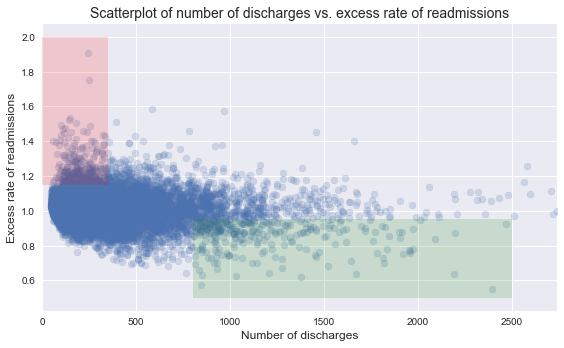

In [98]:
'''
The scatterplot that was built earlier, to compare with the new plot
'''

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

#### Construct another plot that conveys the same information in a more direct manner.

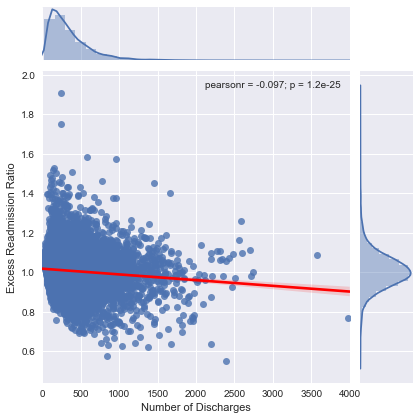

In [107]:
_ = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data = clean_hospital_read_df, 
                  kind='reg', xlim=(0,4000), joint_kws={'line_kws':{'color':'red'}})

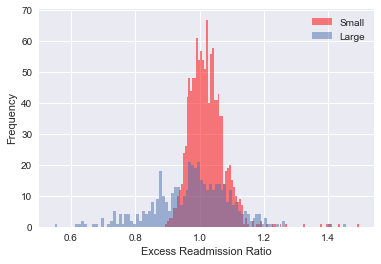

In [101]:
_ = plt.hist(small_hosp['Excess Readmission Ratio'], color = 'r',alpha=.5, bins =100, label = 'Small')
_ = plt.hist(large_hosp['Excess Readmission Ratio'],alpha=.5, bins =100, label='Large')
_ = plt.legend()
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('Frequency')